### Mobile Device Usage and User Behavior Dataset

#### Data Source :https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset/data 

#### Problem Type : Multi Class Classification 

#### Importing libraries and reading csv file

In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('user_behavior_dataset.csv')

### EDA

In [13]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [14]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [15]:
df.shape

(700, 11)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [18]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(str(col)+'------>'+str(df[col].unique()))

Device Model------>['Google Pixel 5' 'OnePlus 9' 'Xiaomi Mi 11' 'iPhone 12'
 'Samsung Galaxy S21']
Operating System------>['Android' 'iOS']
Gender------>['Male' 'Female']


In [19]:
df = pd.get_dummies(df, columns=['Device Model'])

In [21]:
df = pd.get_dummies(df, columns=['Operating System'])

In [22]:
df = pd.get_dummies(df, columns=['Gender'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   App Usage Time (min/day)         700 non-null    int64  
 1   Screen On Time (hours/day)       700 non-null    float64
 2   Battery Drain (mAh/day)          700 non-null    int64  
 3   Number of Apps Installed         700 non-null    int64  
 4   Data Usage (MB/day)              700 non-null    int64  
 5   Age                              700 non-null    int64  
 6   User Behavior Class              700 non-null    int64  
 7   Device Model_Google Pixel 5      700 non-null    int32  
 8   Device Model_OnePlus 9           700 non-null    int32  
 9   Device Model_Samsung Galaxy S21  700 non-null    int32  
 10  Device Model_Xiaomi Mi 11        700 non-null    int32  
 11  Device Model_iPhone 12           700 non-null    int32  
 12  Operating System_Andro

In [25]:
for col in df.columns:
    if df[col].dtype == bool:
        df[col] = df[col].astype(int)

In [27]:
df.drop('User ID',axis = 1,inplace= True)

In [30]:
corr = df.corr()

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
plt.figure(figsize=(18, 14))  # Larger figure size

<Figure size 1800x1400 with 0 Axes>

<Figure size 1800x1400 with 0 Axes>

<Axes: >

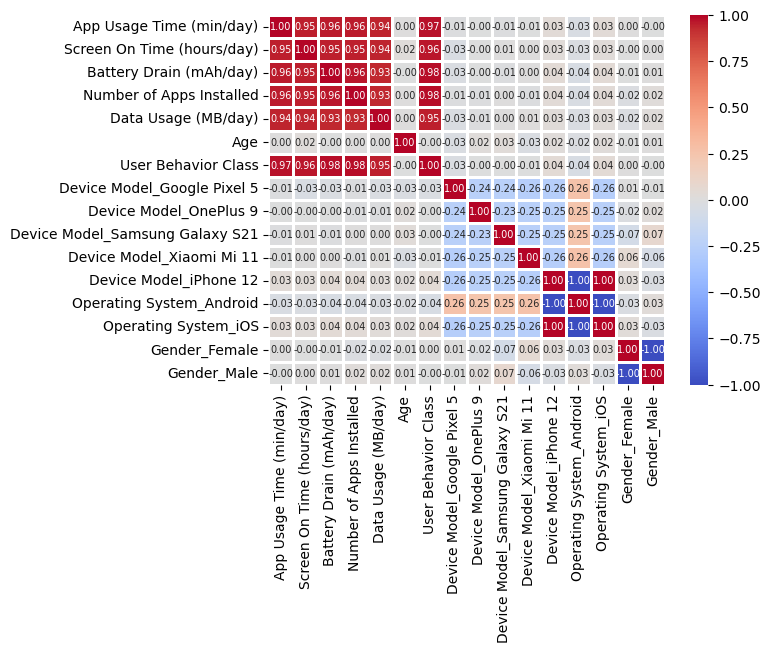

In [52]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.9, 
            annot_kws={"size": 7})  # Change font size of annotations

### From the heat map we can see

#### Theses columns has high correlation with User Behavior Class
#### 1.App Usage Time (min/day)
#### 2.Number of Apps Installed
#### 3.Data Usage (MB/day)
#### 4.Battery Usage in (MAH/day)

In [54]:
df['App Usage Time (min/day)'].nunique()

387

Text(0, 0.5, 'Count')

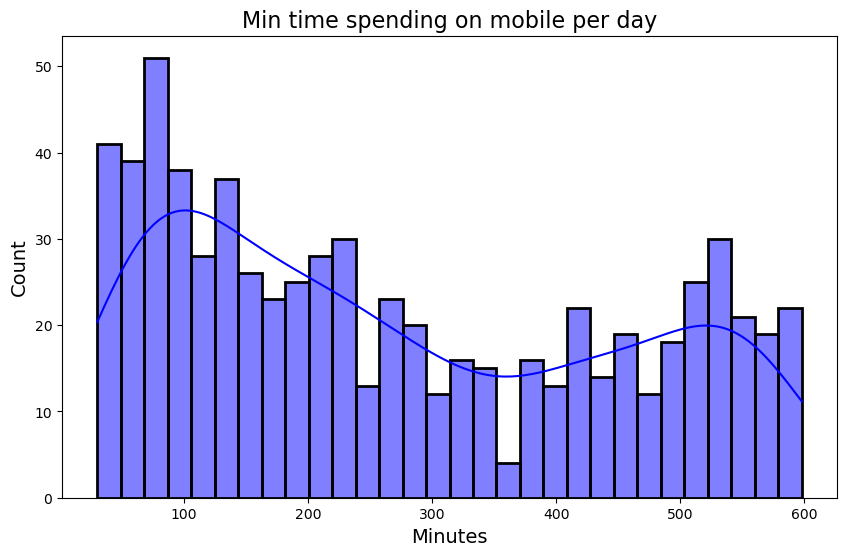

In [58]:
plt.figure(figsize=(10, 6))  # Optional: Increase the figure size
sns.histplot(df['App Usage Time (min/day)'], kde=True, color='blue', bins=30, linewidth=2)

# Customize plot
plt.title('Min time spending on mobile per day', fontsize=16)
plt.xlabel('Minutes', fontsize=14)
plt.ylabel('Count', fontsize=14)

In [61]:
df[df['App Usage Time (min/day)']<=300].shape[0]/df.shape[0]

0.6071428571428571

#### Most of the mobile usage users spending per day is less that 6 hours(300 minutes)

Text(0, 0.5, 'Count')

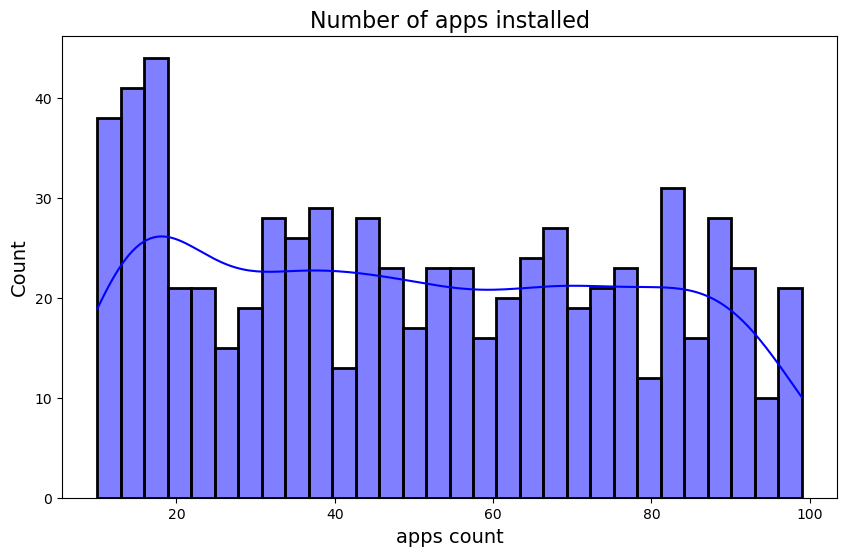

In [65]:
plt.figure(figsize=(10, 6))  # Optional: Increase the figure size
sns.histplot(df['Number of Apps Installed'], kde=True, color='blue', bins=30, linewidth=2)

# Customize plot
plt.title('Number of apps installed', fontsize=16)
plt.xlabel('apps count', fontsize=14)
plt.ylabel('Count', fontsize=14)

Text(0, 0.5, 'Count')

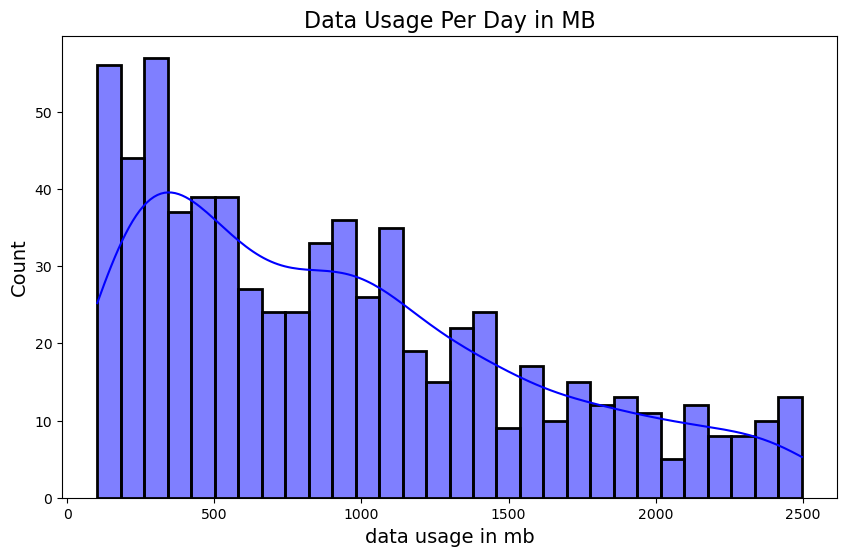

In [67]:
plt.figure(figsize=(10, 6))  # Optional: Increase the figure size
sns.histplot(df['Data Usage (MB/day)'], kde=True, color='blue', bins=30, linewidth=2)

# Customize plot
plt.title('Data Usage Per Day in MB', fontsize=16)
plt.xlabel('data usage in mb', fontsize=14)
plt.ylabel('Count', fontsize=14)

Text(0, 0.5, 'Count')

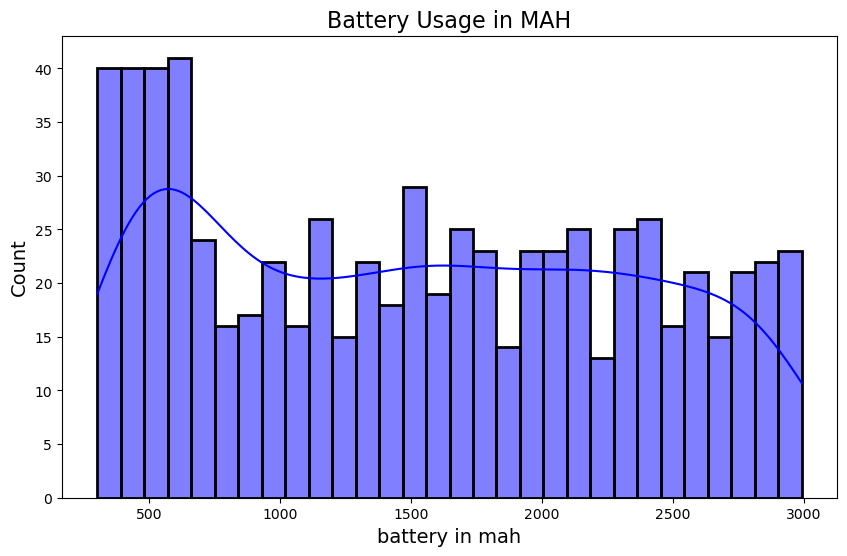

In [71]:
plt.figure(figsize=(10, 6))  # Optional: Increase the figure size
sns.histplot(df['Battery Drain (mAh/day)'], kde=True, color='blue', bins=30, linewidth=2)

# Customize plot
plt.title('Battery Usage in MAH', fontsize=16)
plt.xlabel('battery in mah', fontsize=14)
plt.ylabel('Count', fontsize=14)

Text(0, 0.5, 'Count')

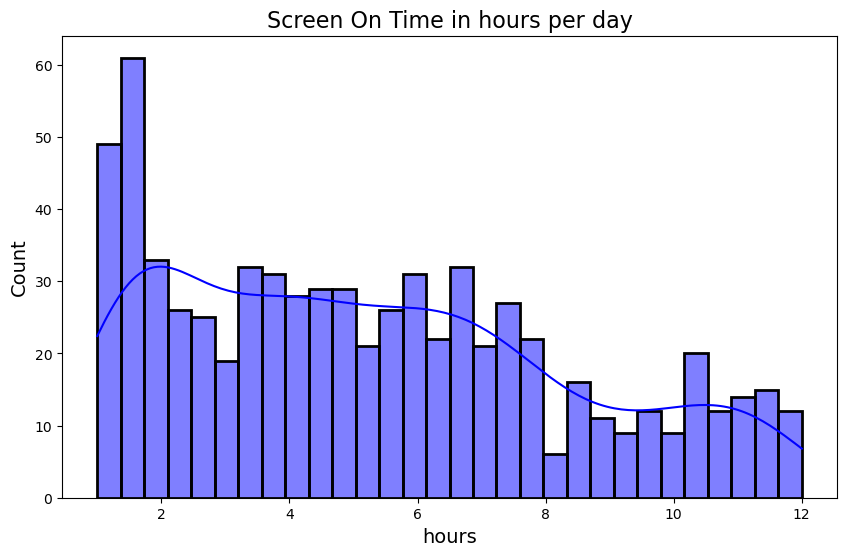

In [75]:
plt.figure(figsize=(10, 6))  # Optional: Increase the figure size
sns.histplot(df['Screen On Time (hours/day)'], kde=True, color='blue', bins=30, linewidth=2)

# Customize plot
plt.title('Screen On Time in hours per day', fontsize=16)
plt.xlabel('hours', fontsize=14)
plt.ylabel('Count', fontsize=14)

In [76]:
df['User Behavior Class'].value_counts()

User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64

### Model Building

In [107]:
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
import warnings

In [108]:
X = df[['App Usage Time (min/day)','Number of Apps Installed','Battery Drain (mAh/day)','Data Usage (MB/day)']]
y = df['User Behavior Class']

In [109]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [110]:
def evaluate_model(true, predicted):
    acc_score = accuracy_score(true, predicted)
    return acc_score

In [120]:
from sklearn.metrics import f1_score  # Ensure the function is imported

model_list = []
accuracy_list_train = []
accuracy_list_test = []
f1_scores_list = []  # Renaming the list to avoid conflict with the f1_score function

models = {
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    #"XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Evaluate Train and Test dataset
    model_train_accuracy_score = evaluate_model(y_train, y_train_pred)
    model_test_accuracy_score = evaluate_model(y_test, y_test_pred)
    
    print(model)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Train accuracy: {:.4f}".format(model_train_accuracy_score))

    print('---------------------------')
    print('Model performance for Test set')
    print("- Test accuracy: {:.4f}".format(model_test_accuracy_score))
    
    accuracy_list_train.append(model_train_accuracy_score)
    accuracy_list_test.append(model_test_accuracy_score)
    
    # Calculate f1_score with 'macro' average for multiclass classification
    f1 = f1_score(y_test, y_test_pred, average='macro')# Use 'macro' or 'weighted' for multiclass
    print("f1_score ----> "+str(f1))
    f1_scores_list.append(f1)  # Append to the renamed list
    
    print('='*35)
    print('\n')


KNeighborsClassifier()
K-Neighbors Classifier
Model performance for Training set
- Train accuracy: 1.0000
---------------------------
Model performance for Test set
- Test accuracy: 1.0000
f1_score ----> 1.0


DecisionTreeClassifier()
Decision Tree
Model performance for Training set
- Train accuracy: 1.0000
---------------------------
Model performance for Test set
- Test accuracy: 1.0000
f1_score ----> 1.0


RandomForestClassifier()
Random Forest Classifier
Model performance for Training set
- Train accuracy: 1.0000
---------------------------
Model performance for Test set
- Test accuracy: 1.0000
f1_score ----> 1.0


Learning rate set to 0.0763
0:	learn: 1.3825729	total: 5.88ms	remaining: 5.88s
1:	learn: 1.2151339	total: 9.53ms	remaining: 4.76s
2:	learn: 1.0679735	total: 13.9ms	remaining: 4.63s
3:	learn: 0.9557818	total: 17.5ms	remaining: 4.35s
4:	learn: 0.8631585	total: 21.2ms	remaining: 4.21s
5:	learn: 0.7789100	total: 24.7ms	remaining: 4.09s
6:	learn: 0.7040382	total: 28.8ms	remai

C:\Users\ramac\anaconda3\anaconda\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()
AdaBoost Classifier
Model performance for Training set
- Train accuracy: 0.6224
---------------------------
Model performance for Test set
- Test accuracy: 0.5381
f1_score ----> 0.48801317149749207


GradientBoostingClassifier()
GradientBoostingClassifier
Model performance for Training set
- Train accuracy: 1.0000
---------------------------
Model performance for Test set
- Test accuracy: 1.0000
f1_score ----> 1.0




In [121]:
pd.DataFrame(list(zip(model_list, f1_scores_list)), columns=['Model Name', 'f1']).sort_values(by=["f1"],ascending=False)

,Model Name,f1
0,K-Neighbors Classifier,1.000000
1,Decision Tree,1.000000
2,Random Forest Classifier,1.000000
3,CatBoosting Classifier,1.000000
5,GradientBoostingClassifier,1.000000
4,AdaBoost Classifier,0.488013
